# 第二周数据报告——叶子嫣

## 波士顿房价数据分析

### 分析Housing.csv文件中的波士顿房价数据集

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 设置图表样式

In [21]:
sns.set_style('whitegrid')

In [22]:
# 加载数据（没有列名，我就按照常见房价数据集进行列名）
column_names=['犯罪率','住宅用地比例','非零售商业用地比例','是否靠河','氮氧化物浓度','平均房间数','房龄','距离就业中心距离','高速公路可达性','财产税率','师生比','黑人比例','低收入人口比例','房价中位数']


In [23]:
# 读取数据（假设是制表符分隔）
df = pd.read_csv('housing.csv',sep='\s+',header=None,names=column_names)

In [24]:
# 显示数据集基本信息
print("数据集形状：", df.shape)
df.info()

数据集形状： (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   犯罪率        506 non-null    float64
 1   住宅用地比例     506 non-null    float64
 2   非零售商业用地比例  506 non-null    float64
 3   是否靠河       506 non-null    int64  
 4   氮氧化物浓度     506 non-null    float64
 5   平均房间数      506 non-null    float64
 6   房龄         506 non-null    float64
 7   距离就业中心距离   506 non-null    float64
 8   高速公路可达性    506 non-null    int64  
 9   财产税率       506 non-null    float64
 10  师生比        506 non-null    float64
 11  黑人比例       506 non-null    float64
 12  低收入人口比例    506 non-null    float64
 13  房价中位数      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [25]:
# 显示前几行数据
df.head()

,犯罪率,住宅用地比例,非零售商业用地比例,是否靠河,氮氧化物浓度,平均房间数,房龄,距离就业中心距离,高速公路可达性,财产税率,师生比,黑人比例,低收入人口比例,房价中位数
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
# 基本统计信息
df.describe()

,犯罪率,住宅用地比例,非零售商业用地比例,是否靠河,氮氧化物浓度,平均房间数,房龄,距离就业中心距离,高速公路可达性,财产税率,师生比,黑人比例,低收入人口比例,房价中位数
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
# 检查缺失值
df.isnull().sum()

犯罪率          0
住宅用地比例       0
非零售商业用地比例    0
是否靠河         0
氮氧化物浓度       0
平均房间数        0
房龄           0
距离就业中心距离     0
高速公路可达性      0
财产税率         0
师生比          0
黑人比例         0
低收入人口比例      0
房价中位数        0
dtype: int64

### 探索性数据分析

C:\Users\17353\AppData\Local\Temp\ipykernel_804\97836543.py:3: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from current font.
  plt.tight_layout()
C:\Users\17353\AppData\Local\Temp\ipykernel_804\97836543.py:3: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from current font.
  plt.tight_layout()
C:\Users\17353\AppData\Local\Temp\ipykernel_804\97836543.py:3: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
C:\Users\17353\AppData\Local\Temp\ipykernel_804\97836543.py:3: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  plt.tight_layout()
C:\Users\17353\AppData\Local\Temp\ipykernel_804\97836543.py:3: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  plt.tight_layout()
C:\Users\17353\AppData\Local\Temp\ipykernel_804\97836543.py:3: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  plt.t

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40657 (\N{CJK UNIFIED IDEOGRAPH-9ED1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

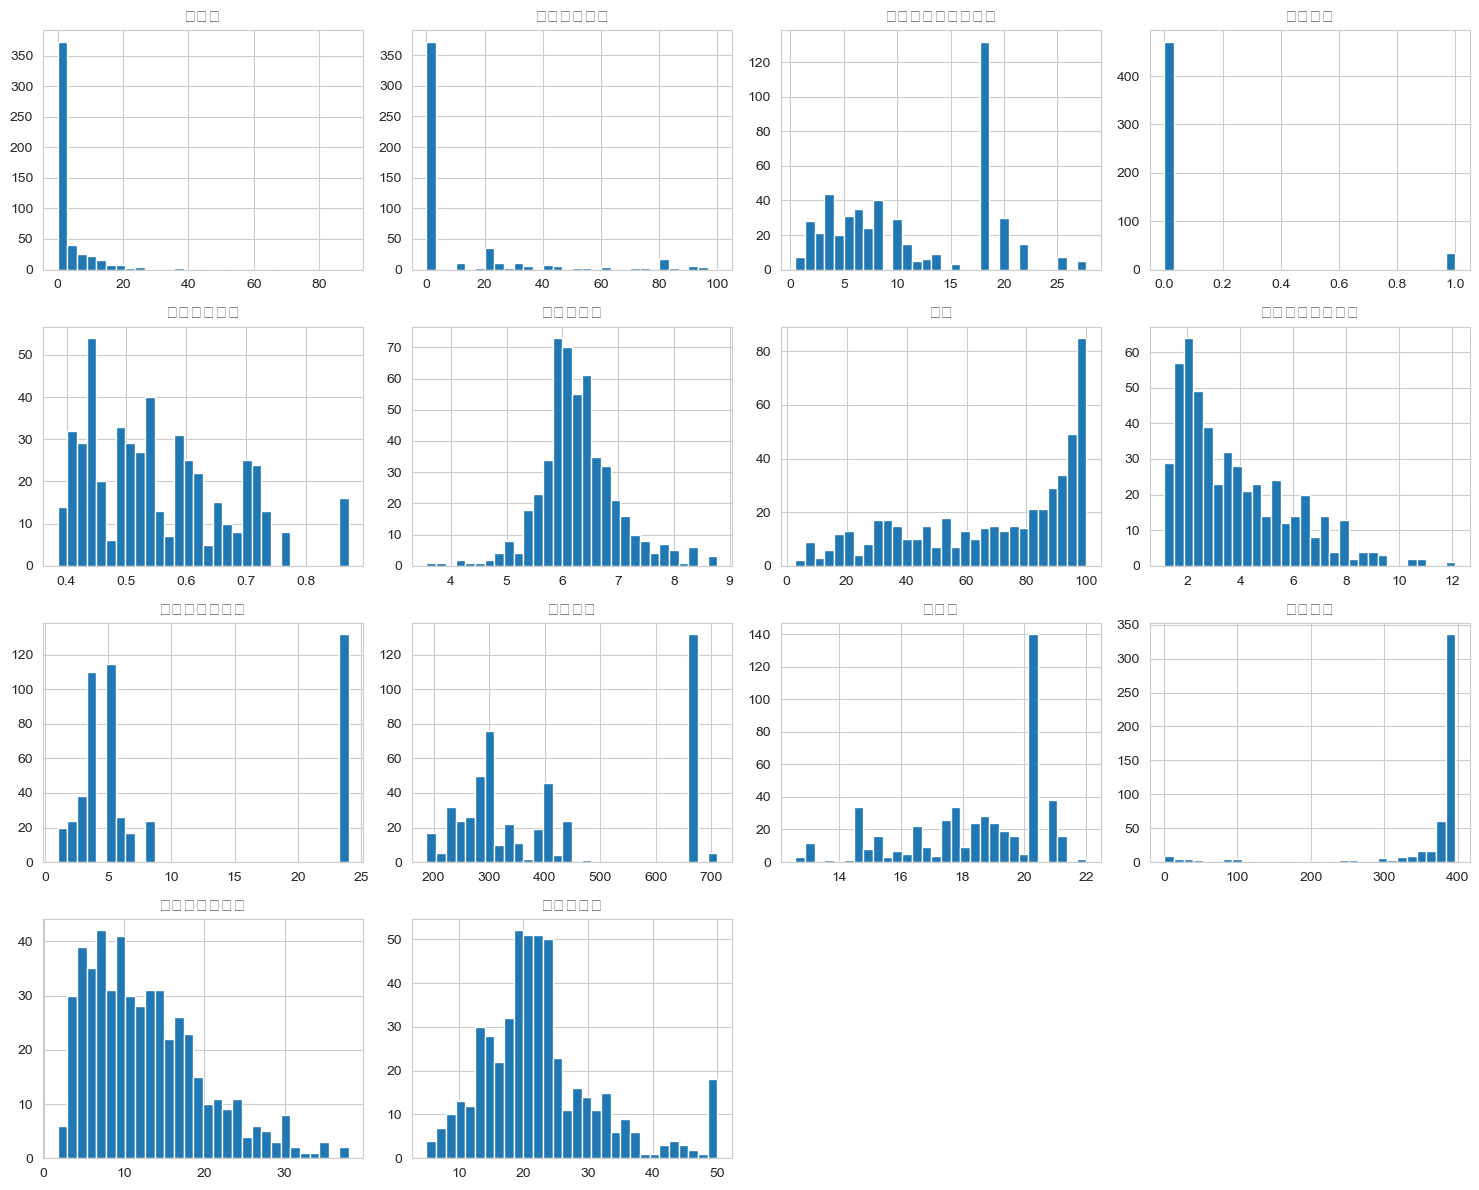

In [28]:
# 所有变量的直方图
df.hist(figsize=(15, 12),bins=30)
plt.tight_layout()
plt.show()

C:\app\anoconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from current font.
  fig.canvas.draw()
C:\app\anoconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from current font.
  fig.canvas.draw()
C:\app\anoconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.draw()
C:\app\anoconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.draw()
C:\app\anoconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.draw()
C:\app\anoconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.draw()
C:\app\anoconda\Lib\site-packages\seabor

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

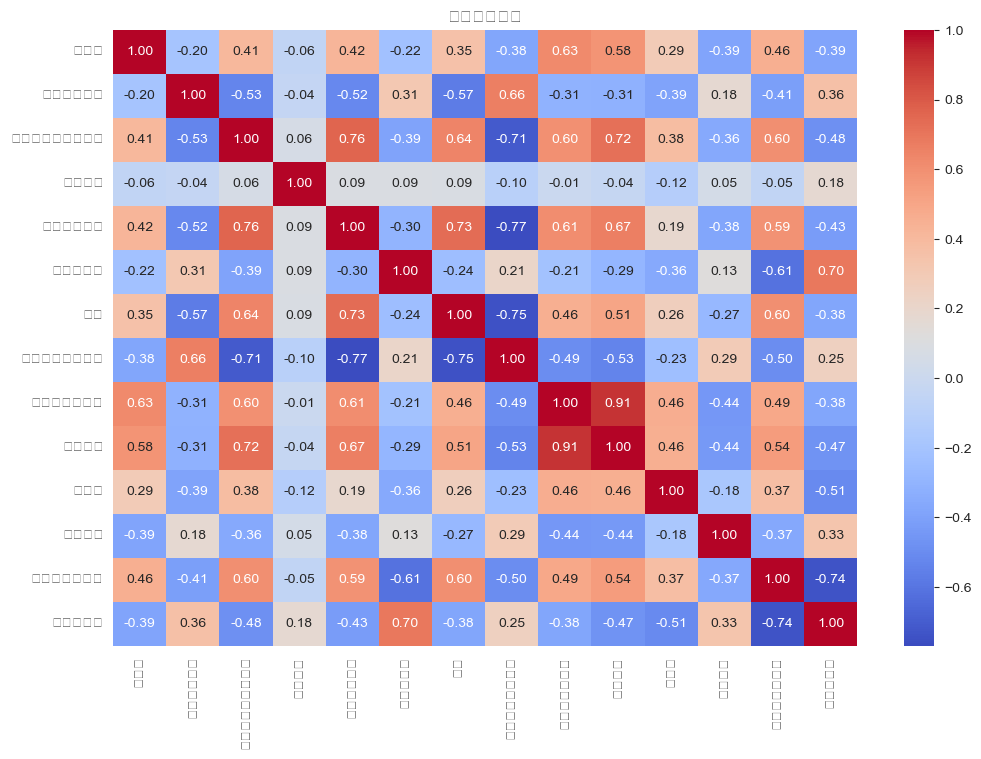

In [29]:
# 相关系数矩阵
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('相关系数矩阵')
plt.show()

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

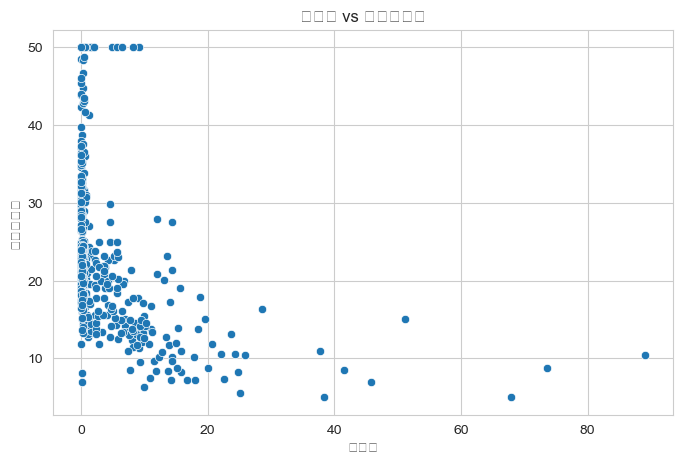

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

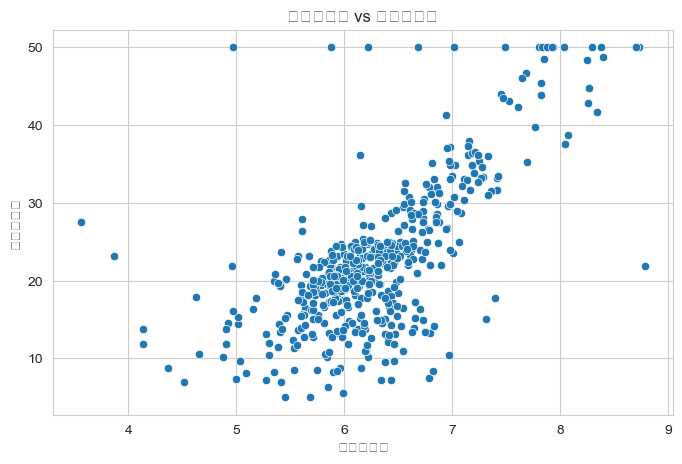

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

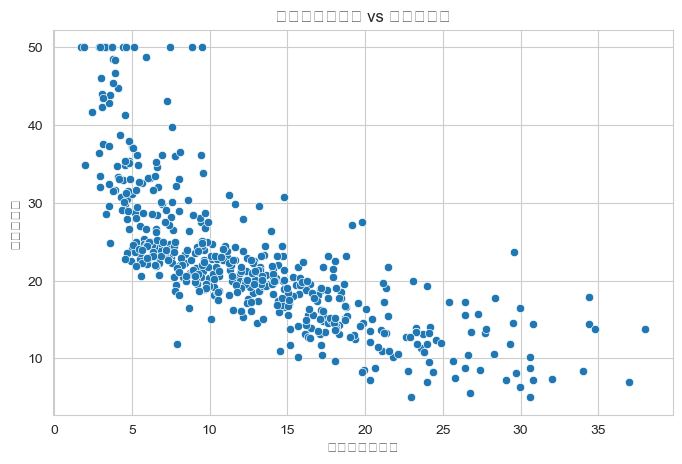

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24072 (\N{CJK UNIFIED IDEOGRAPH-5E08}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

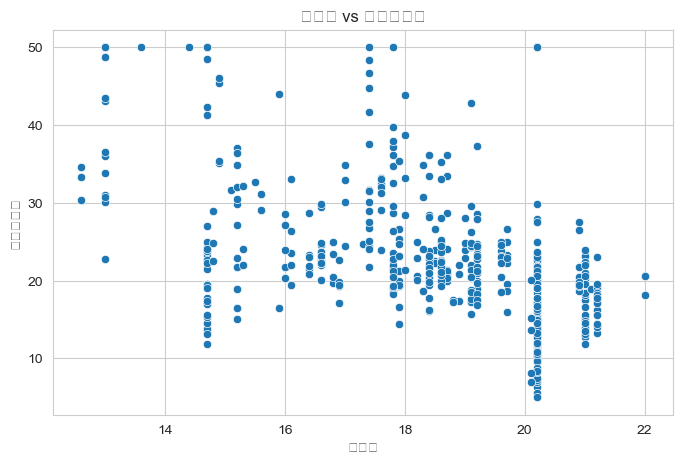

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38646 (\N{CJK UNIFIED IDEOGRAPH-96F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

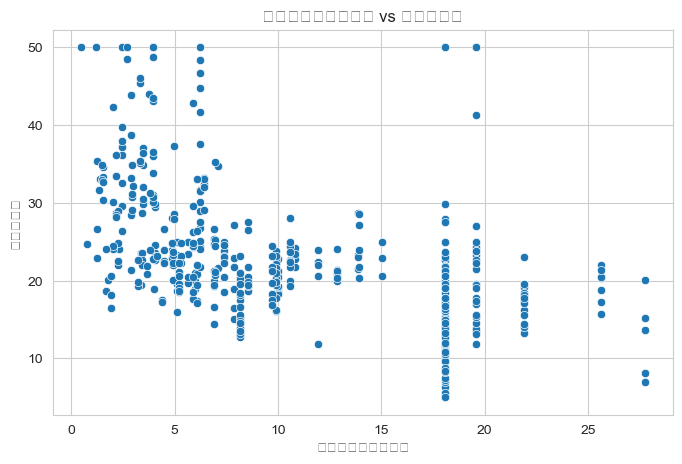

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27694 (\N{CJK UNIFIED IDEOGRAPH-6C2E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27687 (\N{CJK UNIFIED IDEOGRAPH-6C27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

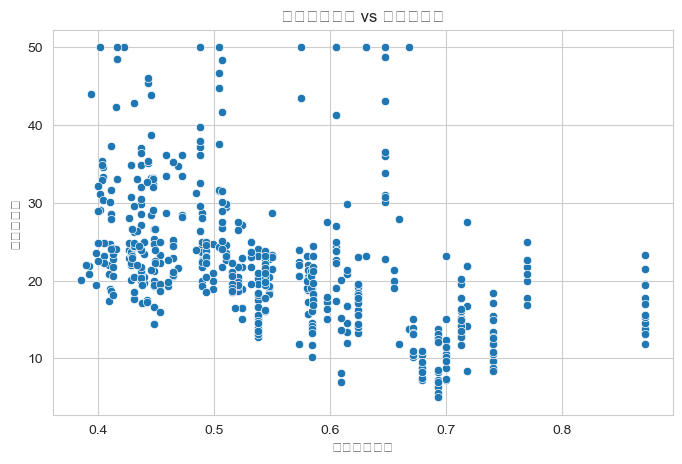

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

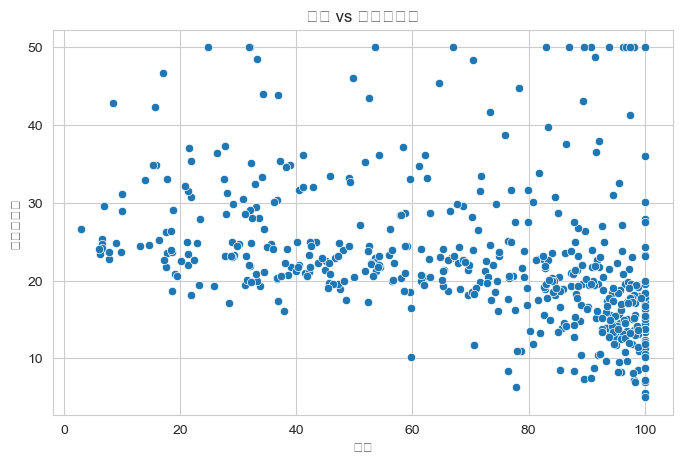

In [30]:
# 重要特征与目标变量（房价中位数）的散点图
features = ['犯罪率','平均房间数','低收入人口比例','师生比','非零售商业用地比例','氮氧化物浓度','房龄']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['房价中位数'])
    plt.title(f'{feature} vs 房价中位数')
    plt.show()

C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38752 (\N{CJK UNIFIED IDEOGRAPH-9760}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27827 (\N{CJK UNIFIED IDEOGRAPH-6CB3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\app\anoconda\Lib\site-packages\I

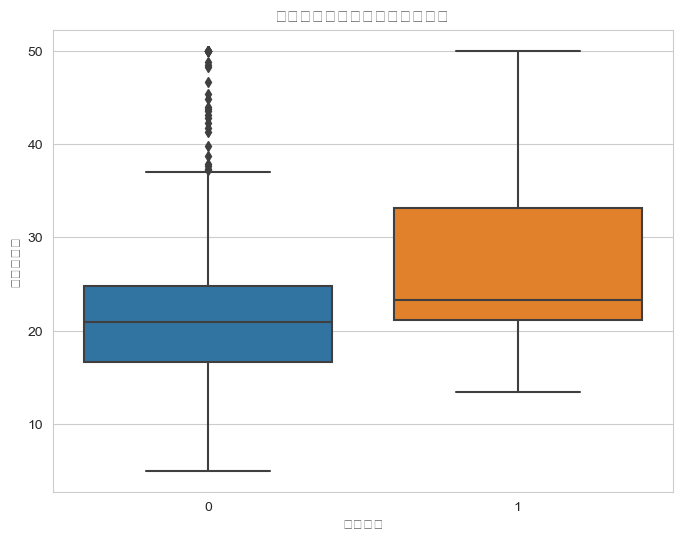

In [31]:
# 按是否靠河分组的房价箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='是否靠河', y='房价中位数', data=df)
plt.title('查尔斯河附近与房价中位数关系')
plt.show()

### 数据预处理

In [32]:
# 分割特征和目标变量
x = df.drop('房价中位数', axis=1)
y = df['房价中位数']

# 分割训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#特征缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

均方误差（MSE):24.29
均方根误差（RMSE):4.93
R平方值:0.67


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

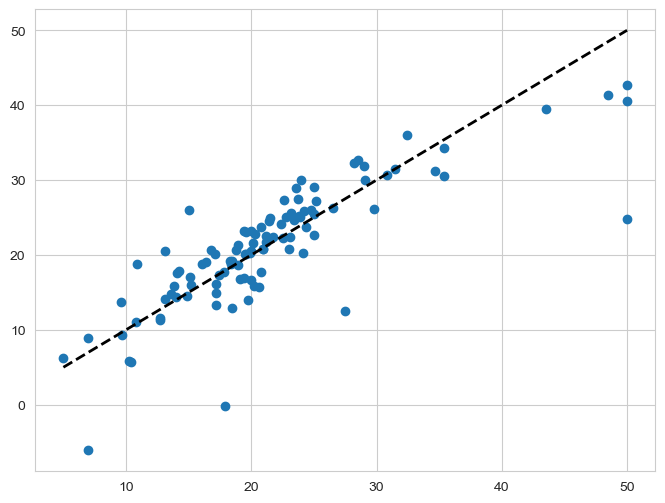

In [34]:
### 模型构建（线性回归）
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 创建并训练模型
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 预测
y_pred = lr.predict(X_test_scaled)

#评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"均方误差（MSE):{mse:.2f}")
print(f"均方根误差（RMSE):{rmse:.2f}")
print(f"R平方值:{r2:.2f}")

# 绘制预测值与实际值对比
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlable('实际值')
plt.ylable('预测值')
plt.title('实际房价与预测房价对比')
plt.show()

#特征重要性
coefficients = pd.DataFrame({
    '特征': X.columns,
    '系数':lr.coef_
}).sort_values(by='系数',ascending=False)

coefficients

### 小结：
- 数据加载：
使用中文列名读取数据
包含错误处理机制
- 探索性数据分析：
显示数据形状和基本信息
各变量的统计描述
缺失值检查
所有变量的直方图
相关系数矩阵热力图
关键特征与房价的散点图
是否靠河与房价的箱线图分析
- 数据预处理：
特征与目标变量分离 
训练集/测试集分割
特征标准化
- 模型构建与评估：
线性回归模型示例
模型性能评估(MSE, RMSE, R²)
预测值与实际值对比图
特征重要性分析(系数大小)